# Mapping Extraction: The Spatial Relationship Between Jails and Data Centers In Los Angeles 

## Amil Hogan


In this analysis, I focus on age to understand their role in the spatial relationship between jails and data centers as sites of extraction in Los Angeles County. Age is a crucial factor, as young adults, particularly those within their twenties, are disproportionately impacted by mass incarceration. Mapping age distributions allows my group to identify which age groups are most affected by the extractive practices of the jail system and the resource demands of data centers. 



In [3]:
!pip install pandas openpyxl


In [4]:
import pandas as pd

# Load the CSV file
file_path = "age and sex.csv"  # Ensure the file name matches exactly
data = pd.read_csv(file_path)

# Display the first few rows of the data
print(data.head())


                 GEO_ID                                               NAME  \
0             Geography                               Geographic Area Name   
1  1400000US06037101110  Census Tract 1011.10; Los Angeles County; Cali...   
2  1400000US06037101122  Census Tract 1011.22; Los Angeles County; Cali...   
3  1400000US06037101220  Census Tract 1012.20; Los Angeles County; Cali...   
4  1400000US06037101221  Census Tract 1012.21; Los Angeles County; Cali...   

                      S0101_C01_001E  \
0  Estimate!!Total!!Total population   
1                               4152   
2                               4198   
3                               3434   
4                               3931   

                             S0101_C01_001M  \
0  Margin of Error!!Total!!Total population   
1                                       441   
2                                       852   
3                                       446   
4                                       618   

       

/tmp/ipykernel_206/2473919849.py:5: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [9]:
print(age_population.dtypes)


NAME              object
S0101_C01_001E    object
dtype: object


In [10]:
age_population["S0101_C01_001E"] = pd.to_numeric(age_population["S0101_C01_001E"], errors="coerce")


In [11]:
print(age_population["NAME"].isna().sum())  # Check for missing values
age_population = age_population.dropna(subset=["NAME", "S0101_C01_001E"])  # Drop rows with missing values


0


 # Population Distribution in Los Angeles County for Ages 20–24

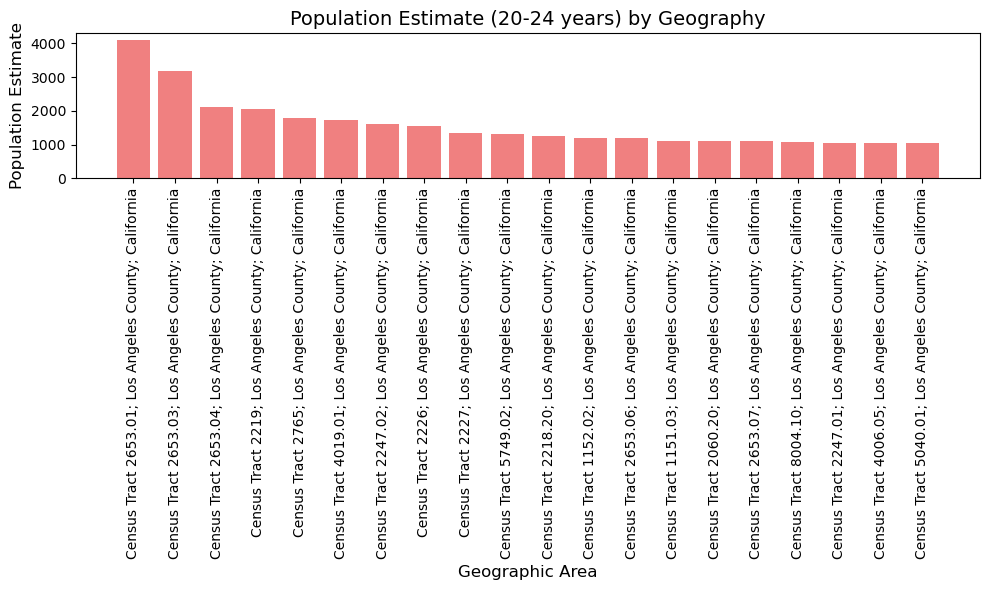

In [17]:

filtered_data_20_24 = data[["NAME", "S0101_C01_006E"]].copy()


filtered_data_20_24.rename(columns={"S0101_C01_006E": "Estimate_20_24"}, inplace=True)


filtered_data_20_24["Estimate_20_24"] = pd.to_numeric(filtered_data_20_24["Estimate_20_24"], errors="coerce")


filtered_data_20_24.dropna(subset=["Estimate_20_24"], inplace=True)


filtered_data_20_24.sort_values(by="Estimate_20_24", ascending=False, inplace=True)


plt.figure(figsize=(10, 6))
plt.bar(filtered_data_20_24["NAME"][:20], filtered_data_20_24["Estimate_20_24"][:20], color="lightcoral")
plt.title("Population Estimate (20-24 years) by Geography", fontsize=14)
plt.xlabel("Geographic Area", fontsize=12)
plt.ylabel("Population Estimate", fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()


In [ ]:
This graph highlights the distribution of the 20-24 age group across the top 20 geographic areas in Los Angeles County, 
California. The height of the bars indicates the estimated population in each area, with the highest populations 
concentrated in specific tracts. This data provides foundational demographic context that can be overlaid with other 
datasets, such as the locations of jails and data centers, to analyze how the system might disproportionately impact 
young populations.

 # Population Distribution in Los Angeles County for Ages 25–29

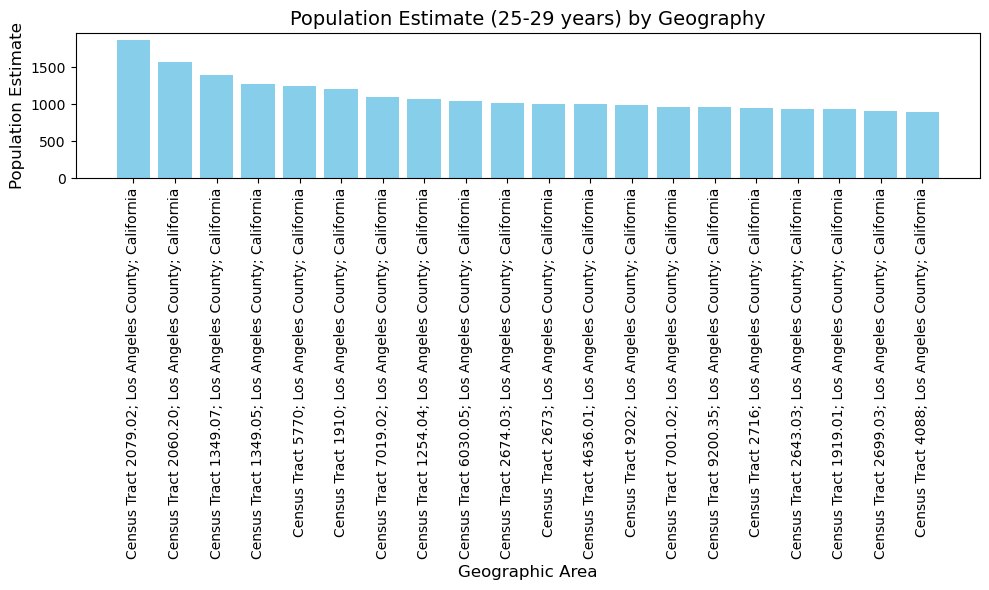

In [15]:
import matplotlib.pyplot as plt


filtered_data = data[["NAME", "S0101_C01_007E"]].copy()


filtered_data.rename(columns={
    "S0101_C01_007E": "Estimate_25_29"
}, inplace=True)


filtered_data["Estimate_25_29"] = pd.to_numeric(filtered_data["Estimate_25_29"], errors="coerce")


filtered_data.dropna(subset=["Estimate_25_29"], inplace=True)


filtered_data.sort_values(by="Estimate_25_29", ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
plt.bar(filtered_data["NAME"][:20], filtered_data["Estimate_25_29"][:20], color="skyblue")
plt.title("Population Estimate (25-29 years) by Geography", fontsize=14)
plt.xlabel("Geographic Area", fontsize=12)
plt.ylabel("Population Estimate", fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()


In [ ]:
This graph highlights the distribution of the 25-29 age group across the top 20 geographic areas in Los Angeles County, 
California. The height of the bars indicates the estimated population in each area, with the highest populations 
concentrated in specific tracts. 

 # Population Estimates by Age Group in Los Angeles County (20-24 vs. 25-29)

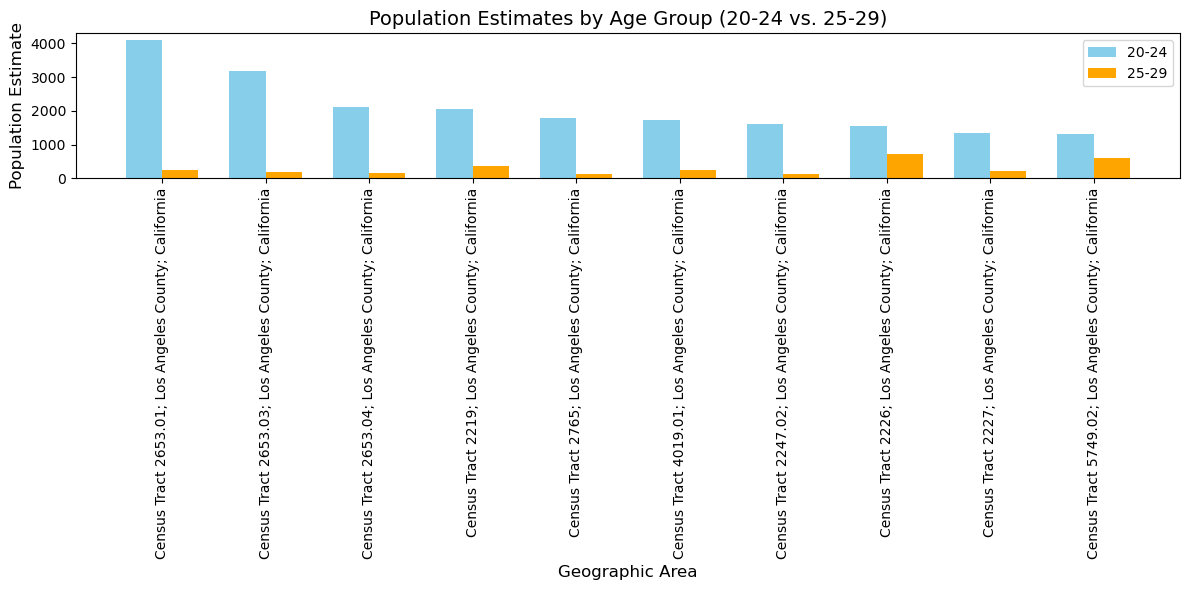

In [20]:
import matplotlib.pyplot as plt


grouped_data = data[["NAME", "S0101_C01_006E", "S0101_C01_007E"]].copy()


grouped_data.rename(columns={
    "S0101_C01_006E": "20-24",
    "S0101_C01_007E": "25-29"
}, inplace=True)

grouped_data["20-24"] = pd.to_numeric(grouped_data["20-24"], errors="coerce")
grouped_data["25-29"] = pd.to_numeric(grouped_data["25-29"], errors="coerce")


grouped_data.dropna(subset=["20-24", "25-29"], inplace=True)


grouped_data.sort_values(by="20-24", ascending=False, inplace=True)


top_10_data = grouped_data.head(10)


plt.figure(figsize=(12, 6))
bar_width = 0.35  # Width of the bars
x = range(len(top_10_data))  # X-axis positions

"
plt.bar(x, top_10_data["20-24"], width=bar_width, label="20-24", color="skyblue")
plt.bar([p + bar_width for p in x], top_10_data["25-29"], width=bar_width, label="25-29", color="orange")


plt.xlabel("Geographic Area", fontsize=12)
plt.ylabel("Population Estimate", fontsize=12)
plt.title("Population Estimates by Age Group (20-24 vs. 25-29)", fontsize=14)
plt.xticks([p + bar_width / 2 for p in x], top_10_data["NAME"], rotation=90, fontsize=10)


plt.legend()


plt.tight_layout()
plt.show()


In [ ]:

This grouped bar chart compares population estimates for two age groups, 20-24 and 25-29, across the top geographic 
areas in Los Angeles County, California. The chart reveals that while both age groups follow similar distribution 
patterns across the selected tracts, the younger age group generally exhibits higher population estimates.

In [24]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


In [31]:
shapefile_path = "./tl_2020_06_tract_LACounty.shp"


In [32]:
!pip install geopandas fiona pyproj shapely


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 53.2 MB/s eta 0:00:00a 0:00:01


In [33]:
from fiona import listlayers
print(listlayers("./tl_2020_06_tract_LACounty.shp"))


['tl_2020_06_tract_LACounty']


In [35]:
import geopandas as gpd

shapefile_path = "./tl_2020_06_tract_LACounty.shp"
geo_data = gpd.read_file(shapefile_path)

# Check the first few rows of the GeoDataFrame
print(geo_data.head())


  STATEFP COUNTYFP TRACTCE        GEOID     NAME              NAMELSAD  MTFCC  \
0      06      037  262601  06037262601  2626.01  Census Tract 2626.01  G5020   
1      06      037  300100  06037300100     3001     Census Tract 3001  G5020   
2      06      037  300501  06037300501  3005.01  Census Tract 3005.01  G5020   
3      06      037  310701  06037310701  3107.01  Census Tract 3107.01  G5020   
4      06      037  300200  06037300200     3002     Census Tract 3002  G5020   

  FUNCSTAT      ALAND   AWATER     INTPTLAT      INTPTLON  Shape_Leng  \
0        S  3620351.0      0.0  +34.0738344  -118.5557893    0.108596   
1        S  4591342.0  18657.0  +34.2442558  -118.2325716    0.094693   
2        S  1260255.0      0.0  +34.2206887  -118.2400494    0.061435   
3        S   515339.0      0.0  +34.1853923  -118.3128440    0.036201   
4        S  1943986.0  10136.0  +34.2283768  -118.2386852    0.067506   

   Shape_Area                                           geometry  
0    0.

In [56]:
print(merged_data.columns)


Index(['STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID', 'NAME_x', 'NAMELSAD',
       'MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER',
       ...
       'S0101_C06_034M', 'S0101_C06_035E', 'S0101_C06_035M', 'S0101_C06_036E',
       'S0101_C06_036M', 'S0101_C06_037E', 'S0101_C06_037M', 'S0101_C06_038E',
       'S0101_C06_038M', 'Unnamed: 458'],
      dtype='object', length=474)


In [61]:
legend_kwds={"title": "Population 20–24 years"}


In [68]:
pip install mapclassify


Note: you may need to restart the kernel to use updated packages.


In [73]:
merged_data['S0101_C01_006E'] = pd.to_numeric(merged_data['S0101_C01_006E'], errors='coerce')
merged_data = merged_data.dropna(subset=['S0101_C01_006E'])


In [76]:
print(merged_data.columns)  # Confirm the column name
print(merged_data['S0101_C01_007E'].head())  # Check the first few values
print(merged_data['S0101_C01_007E'].isnull().sum())  # Check for missing values


Index(['STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID', 'NAME_x', 'NAMELSAD',
       'MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER',
       ...
       'S0101_C06_034M', 'S0101_C06_035E', 'S0101_C06_035M', 'S0101_C06_036E',
       'S0101_C06_036M', 'S0101_C06_037E', 'S0101_C06_037M', 'S0101_C06_038E',
       'S0101_C06_038M', 'Unnamed: 458'],
      dtype='object', length=474)
0     82
1    198
2     97
3    175
4    395
Name: S0101_C01_007E, dtype: object
0


In [81]:
print(merged_data['S0101_C01_007E'].unique())


['82' '198' '97' '175' '395' '131' '208' '335' '57' '502' '66' '79' '410'
 '368' '154' '185' '528' '454' '133' '174' '399' '445' '411' '431' '331'
 '249' '244' '713' '539' '114' '233' '333' '85' '404' '285' '117' '302'
 '171' '219' 603 '456' '332' '191' '155' '230' '161' '469' 72 '166' '256'
 '422' '462' '328' '226' '235' '205' '622' '317' '234' '352' 24 '325'
 '418' '388' '453' '201' 394 457 424 170 '387' '301' '496' '156' 372 '392'
 '44' '87' '240' '45' 341 '152' '296' '407' '278' 23 '757' '307' 243 '188'
 '223' '487' '176' '303' '499' '142' '140' 364 '413' '493' '488' '270'
 '289' '52' '316' '274' '353' '552' 5 '652' '277' '84' '623' '119' '227'
 '268' '181' '134' 141 '561' '438' '253' '367' '397' '362' '218' '290'
 '194' '160' '506' '214' '294' '401' '663' '471' '372' '461' '557' '430'
 '437' '486' '497' '377' '767' '373' '315' '148' '288' '280' '520' '542'
 '206' '339' '172' '276' '190' 1092 413 '252' '320' '273' '369' '178'
 '311' '195' '238' '264' '470' '473' '522' 316 '236' '29

In [82]:
merged_data['S0101_C01_007E'] = pd.to_numeric(merged_data['S0101_C01_007E'], errors='coerce')


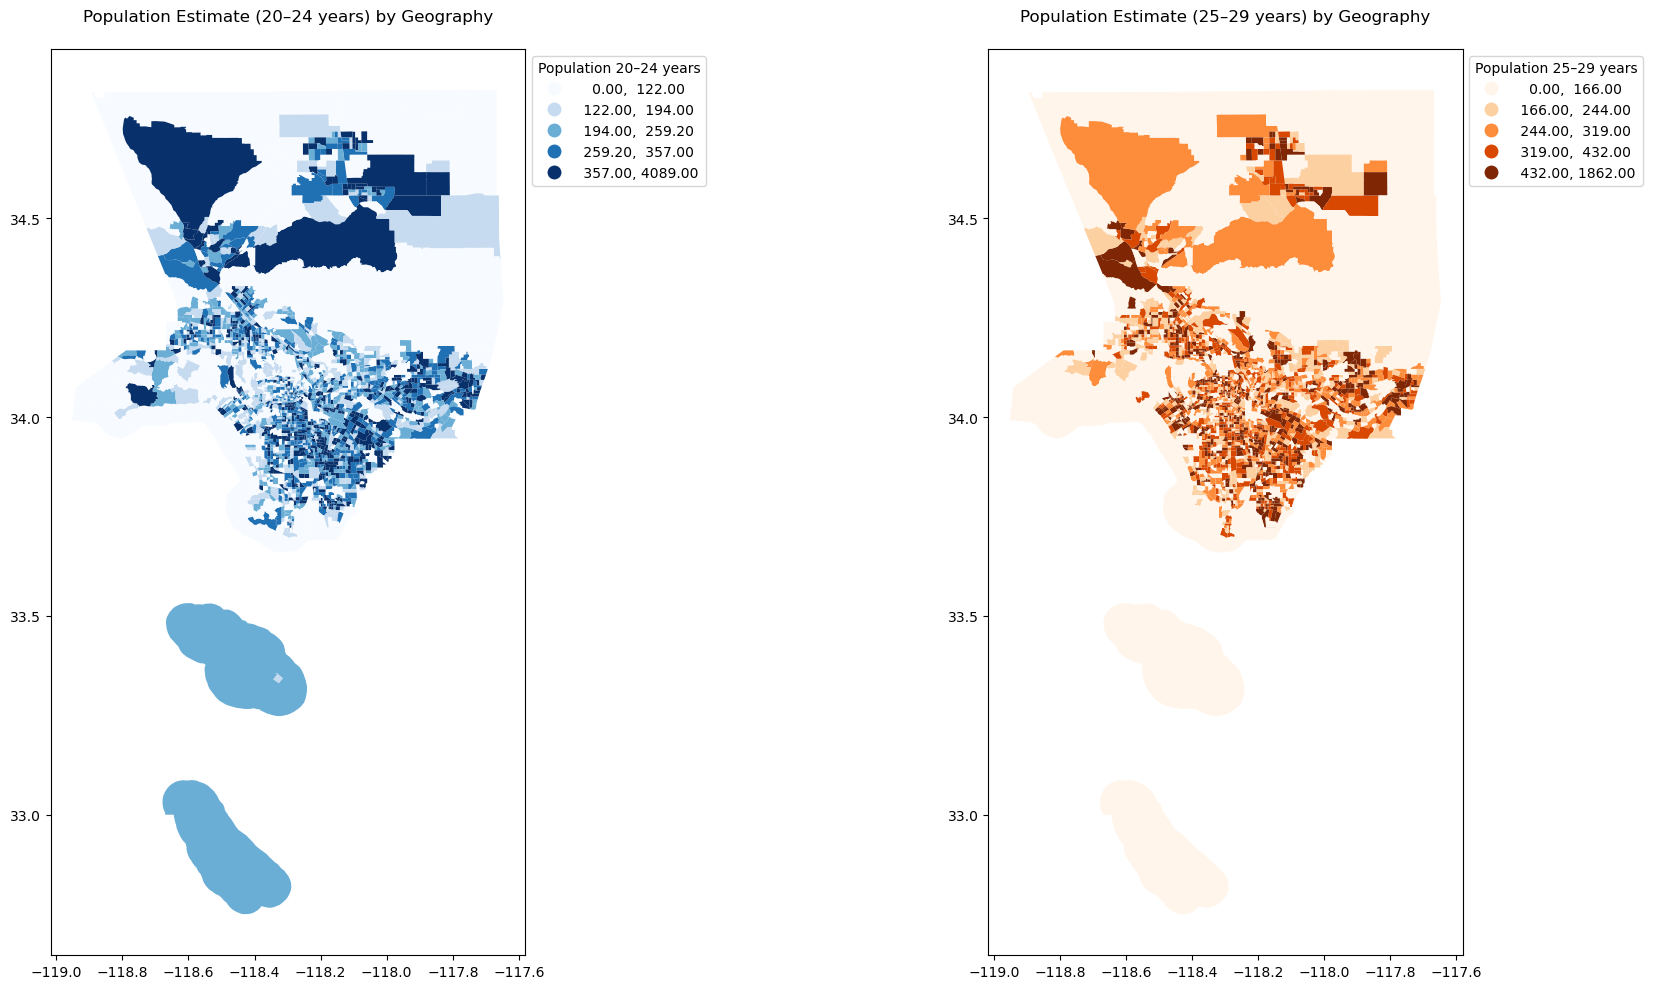

In [83]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))


merged_data.plot(
    column='S0101_C01_006E',
    cmap='Blues',
    legend=True,
    scheme='Quantiles',
    classification_kwds={'k': 5},
    ax=axes[0],
    legend_kwds={
        'title': 'Population 20–24 years',
        'loc': 'upper left',
        'bbox_to_anchor': (1, 1)
    }
)
axes[0].set_title('Population Estimate (20–24 years) by Geography', pad=20)


merged_data.plot(
    column='S0101_C01_007E',  
    cmap='Oranges',
    legend=True,
    scheme='Quantiles',
    classification_kwds={'k': 5},
    ax=axes[1],
    legend_kwds={
        'title': 'Population 25–29 years',
        'loc': 'upper left',
        'bbox_to_anchor': (1, 1)
    }
)
axes[1].set_title('Population Estimate (25–29 years) by Geography', pad=20)

plt.tight_layout()
plt.show()


In [ ]:
Left map (blue): represents the population estimate for the 20-24 age group. Darker shades of blue indicate areas with higher population densities for this age group, 
                concentrated in certain regions.

Right map (orange): Represents the population estimates for the 25-29 age group. Similarly, darker orange areas with higher population densities for his age group are concentrated in 
                 certain regions.